In [2]:
from google.colab import files

uploaded = files.upload()


Saving soc-sign-bitcoinalpha.csv to soc-sign-bitcoinalpha.csv


In [4]:
import numpy as np
import csv
import pandas as pd
import pickle as pk
import networkx as nx
import matplotlib.pyplot as plt
from pylab import *
import scipy.io 
import random
from scipy.linalg import expm

A=[]
N=0

def preprocess_file():
	global A
	global N
	
	file = open("soc-sign-bitcoinalpha.csv","r")
	csv_reader = csv.reader(file, delimiter=',')
	nodes=0
	for row in csv_reader:
		nodes=max(nodes,max(int(row[0]),int(row[1])))
	
	N=nodes

	A=np.zeros((nodes,nodes),dtype=int)
	file1 = open("soc-sign-bitcoinalpha.csv","r")
	csv_reader = csv.reader(file1, delimiter=',')
	for row in csv_reader:
		fr=int(row[0])-1
		to=int(row[1])-1
		value=int(row[2])
		if(value>0):
			A[fr][to]=1
			A[to][fr]=1
		elif(value<0):
			A[fr][to]=-1
			A[to][fr]=-1
	
	A = A[~np.all(A == 0, axis=1)]
	idx = np.argwhere(np.all(A[..., :] == 0, axis=0))
	A=np.delete(A, idx, axis=1)
	print(A.shape)
	print(A)
	N=A.shape[0]

preprocess_file()

(3783, 3783)
[[ 0  1  0 ...  0  1  0]
 [ 1  0  1 ...  0 -1  0]
 [ 0  1  0 ...  0  0 -1]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 1 -1  0 ...  0  0 -1]
 [ 0  0 -1 ...  1 -1  0]]


In [5]:
positive_deg = np.sum(A==1,axis=1) 
Total_positive=np.sum(positive_deg)
negative_deg = np.sum(A==-1,axis=1)
Total_negative=np.sum(negative_deg)
m=int((np.sum(abs(A)))/2)
R=Total_negative/Total_positive
cor_r= np.corrcoef(positive_deg,negative_deg)
T=[0]*5
for i in range(N):
    for j in range(i+1,N):
        if(A[i][j]!=0):
            for k in range(j+1,N):
                if(A[i][k]!=0 and A[j][k]!=0):
                    T[4]+=1
                    if(A[i][k]==1 and A[j][k]==1  and  A[i][j]==1):
                        T[3]+=1
                    elif((A[i][k]==1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==1 and A[j][k]==-1 and A[i][j]==1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==1)):
                        T[2]+=1
                    elif((A[i][k]==1 and A[j][k]==-1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==-1 and A[i][j]==1)):
                        T[1]+=1
                    elif((A[i][k]==-1 and A[j][k]==-1 and A[i][j]==-1)):
                        T[0]+=1

frac_unbalanced=(T[0]+T[2])/T[4]

print("N = "+str(len(A)))
print("M = "+str(m))
print("R (Ratio of negative to positive edges) = "+str(R))
print("Cr (Correlation between positive and negative degree) ="+str(cor_r[1][0]))
print("fr (Fraction of unbalanced triangles) ="+str(frac_unbalanced))

N = 3783
M = 14124.0
R (Ratio of negative to positive edges) = 0.10698330590171644
Cr (Correlation between positive and negative degree) =0.45515228831593635
fr (Fraction of unbalanced triangles) =0.1540649122015077


Correlation Coefficient:- 0.45515228831593635
[166, 1904, 3247, 16836, 22153]
epsilon: 0.038516228050376924
a11: 1
a12: 0.45515228831593635
a21: 0.048693696492770056
a22: 0.10698330590171644
Gamma: 2.05
Delta Plus: 0.8983991462113127
Delta Minus: 0.10160085378868733
p: 0.57
beta: 0.27


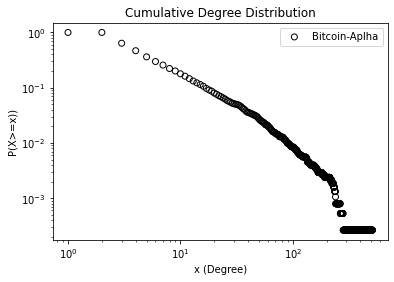

In [7]:

def calculate_triangles(A):
    N=len(A)
    total=0
    T=[0]*5
    for i in range(N):
        for j in range(i+1,N):
            if(A[i][j]!=0):
                for k in range(j+1,N):
                    if(A[i][k]!=0 and A[j][k]!=0):
                        T[4]+=1
                        if(A[i][k]==1 and A[j][k]==1  and  A[i][j]==1):
                            T[3]+=1
                        elif((A[i][k]==1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==1 and A[j][k]==-1 and A[i][j]==1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==1)):
                            T[2]+=1
                        elif((A[i][k]==1 and A[j][k]==-1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==-1 and A[i][j]==1)):
                            T[1]+=1
                        elif((A[i][k]==-1 and A[j][k]==-1 and A[i][j]==-1)):
                            T[0]+=1
    print(T)
    return T

def main():
    N=len(A)
    degree=np.sum(abs(A),axis=1)
    scipy.io.savemat("./x_bitcoin_Alpha.mat",{'degree':degree})
    deg_pos=np.count_nonzero(A==1,axis=1)
    deg_neg=np.count_nonzero(A==-1,axis=1)
    alpha=np.corrcoef(deg_pos,deg_neg)
    print("Correlation Coefficient:- "+str(alpha[1][0]))
    # The below function was run and the found values are now hardcoded
    # T=calculate_triangles(A)
    T=[166,1904,3247,16836,22153]
    print(T)
    epsilon=(T[0]+T[2])/T[4]
    epsilon*=0.25
    print("epsilon: "+str(epsilon))
    
    #Matrix coefficeints
    a11=1
    a12=a11*alpha[1][0]
    a22=a11*(np.sum(deg_neg)/np.sum(deg_pos))
    a21=a22*alpha[1][0]
    print("a11: "+str(a11))
    print("a12: "+str(a12))
    print("a21: "+str(a21))
    print("a22: "+str(a22))
    
    # Obtained from running the matlab function 
    # [gamma,xmin,L]=plfit(degree)
    Gamma=2.05
    print("Gamma: "+str(Gamma))
    
    #Delta-Plus and DeltaMinus
    dPlus=(T[3])/(T[3]+T[1])
    dMinus=1-dPlus
    print("Delta Plus: "+str(dPlus))
    print("Delta Minus: "+str(dMinus))
    
    
    beta=0
    beta1=0
    p=0
    p1=0
    Error=N
    # Caculating the values of beta and p
    # That give the least error 
    for i in range(1,100):
        beta=beta+(1/100)
        for j in range(100):
            p=p+(1/100)
            c1=0.5
            c2=dMinus/dPlus
            c11= (beta*a11)/2 + (1-beta)*p*dPlus + (epsilon*p)/(1-epsilon)
            c12= (beta*a12)/2 + (1-beta)*p*dPlus*c2 + (epsilon*p)/(1-epsilon)
            c21= (beta*a21)/2 + (1-beta)*p*dPlus*c1*c2 + (c2*2*epsilon*p)/(1-epsilon)
            c22= (beta*a22)/2 + (1-beta)*p*dPlus*c1
            error=(c11 - (1/(Gamma - 1)))*(c22 - (1/(Gamma - 1))) - c12*c21
            if(Error > abs(error)):
                Error=abs(error)
                p1=p
                beta1=beta
    
    p1=0.57
    beta1=0.27
    print("p: "+str(p1))
    print("beta: "+str(beta1))
    
    
    # Degree Distribution Probability
    D_DistN=np.bincount(degree)
    max_degree=np.max(degree)
    D_DistN=D_DistN/np.sum(D_DistN)
    
    #Cumulative Degree Distribution (P(X>=x))
    cumdegree=np.zeros((max_degree,1))
    for i in range(max_degree):
        cumdegree[i]=np.sum(D_DistN[i:])
    index=list(range(1,max_degree+1))
  
    fig, ax = plt.subplots()
    ax.scatter(index, cumdegree, facecolors='none', edgecolors='black')
    ax.set_xscale("log")
    ax.set_yscale("log");
    plt.xlabel("x (Degree)")
    plt.ylabel("P(X>=x))")
    plt.legend(["Bitcoin-Aplha"])
    plt.title("Cumulative Degree Distribution")
    plt.show()

if __name__ == "__main__":
    main()

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
18
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
213
214
215
216
217
218
219
220
221
222
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


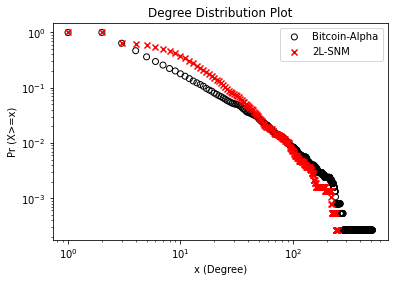

In [8]:

def getColumns(Mat,j):
    ans=[]
    N=len(Mat)
    for i in range(N):
      if(Mat[i][j]==1):
        ans.append(i)
    return ans
def model_2LSNM(A):
    N=len(A)
    T=[166, 1904, 3247, 16836, 22153]
    a11=1
    a12=0.45515228831593635
    a21=0.048693696492770056
    a22=0.10698330590171644
    d_p=0.8017832886350179
    epsilon=0.25*0.1540649122015077
    p=0.57
    Beta=0.26
    
    L1=np.zeros((N,N),dtype=int)
    L2=np.zeros((N,N),dtype=int)
    i=4;
    L1[1][2]=L1[2][1]=1
    L1[3][2]=L1[2][3]=1
    L1[4][2]=L1[2][4]=1
    L1[1][3]=L1[3][1]=1
    L1[4][3]=L1[3][4]=1    
    L2[1][4]=L2[4][1]=1
    
    degree=np.sum(abs(A),axis=1)
    leaf_freq=len(np.argwhere(degree==1))
    while(i<N):
        print(i)
        growth_allowed=True
        pPlus=p
        beta=Beta
        dPlus=np.sum(L1,axis=1)
        dMinus=np.sum(L2,axis=1)

        deltaP=T[3]/(T[1]+T[3]) 
        deltaN=1-deltaP
        if(i > N-leaf_freq):
            pPlus=0
            beta=0
            growth_allowed=False
            p1=np.add(a11*dPlus,a12*dMinus)
            p1=p1/i
            p2=np.add(a21*dPlus,a22*dMinus)
            p2=p2/i
            
            i+=1
            failed=1
            while(failed):
                for j in range(i-1):
                    if((random.random()<=p1[j]) & (L2[i-1][j]==0)):
                        failed=0
                        L1[i-1][j]=1
                        L1[j][i-1]=1
                        break
            continue
        
        pMinus=p/2
        if(random.random()<=(1-epsilon)): # A new node will appear
            # Process-I
            if(random.random()<=beta):
                
                p1=np.add(a11*dPlus,a12*dMinus)
                p1=p1/i
                p2=np.add(a21*dPlus,a22*dMinus)
                p2=p2/i
                i+=1
                success=0
                while(success!=1):
                    for j in range(i-1):
                        rr=random.random()
                        if(rr <=0.5):
                            #Positive Link
                            rrr=random.random()
                            if((rrr<=p1[j]) & (L2[i-1][j]==0)):
                                success=1
                                L1[i-1][j]=L1[j][i-1]=1
                        else:
                            #negative link
                            if((random.random()<=p2[j]) & (L1[i-1][j]==0)):
                                success=1
                                L2[i-1][j]=L2[j][i-1]=1
            
            ##Process II
            else:
                i=i+1
                j=random.randint(0,i-2)
                Nb1=getColumns(L1,j)
                Nb2 = getColumns(L2,j)
                if(random.random()<=deltaN):
                    L2[i-1][j]=1
                    L2[j][i-1]=1
                    for k in range(len(Nb1)): #-+-
                        if((random.random()<=pMinus) & (L1[i-1][Nb1[k]]==0)):
                            L2[i-1][Nb1[k]]=1
                            L2[Nb1[k]][i-1]=1

                    for k in range(len(Nb2)):#--
                        if((random.random()<=pPlus) & L2[i-1][Nb2[k]]==0):
                            L1[i-1][Nb2[k]]=1
                            L1[Nb2[k]][i-1]=1
                else:
                    L1[i-1][j]=1
                    L1[j][i-1]=1
                    for k in range(len(Nb1)): #+++
                        if((random.random()<=pPlus) & (L2[i-1][Nb1[k]]==0)):
                            L1[i-1][Nb1[k]]=1
                            L1[Nb1[k]][i-1]=1

                    for k in range(len(Nb2)):#+--
                        if((random.random()<=pMinus) & (L1[i-1][Nb2[k]]==0)):
                            L2[i-1][Nb2[k]]=1
                            L2[Nb2[k]][i-1]=1
        else:
            #Process III - Internal Growth Process (No new node will appear)
            x=random.randint(0,i-2)
            Nb1=getColumns(L1,x)
            Nb2=getColumns(L2,x)
            if(random.random()<=0.5):
                #Positive Layer
                for k in range(len(Nb1)):   #++-
                    Nbb1=getColumns(L1,Nb1[k])
                    if not Nbb1:
                        for y in range(len(Nbb1)):
                            if((random.random()<pMinus) & (L1[x][Nbb1[y]]==0) & (L2[x][Nbb1[y]]==0)):
                                L2[x][Nbb1[y]]=1
                                L2[Nbb1[y]][x]=1
                                break;
                
                for k in range(len(Nb1)):  #+-+
                    Nbb2=getColumns(L2,Nb1[k])
                    if not Nbb2:
                        for y in range(len(Nbb2)):
                            if((random.random()<pPlus) & (L2[x][Nbb2[y]]==0) & (L2[x][Nbb2[y]]==0)):
                                L1[x][Nbb1[y]]=1
                                L1[Nbb1[y]][x]=1
                                break;
            else:
                #Negative Layer
                for k in range(len(Nb2)):   #-++
                    Nbb1=getColumns(L1,Nb2[k])
                    if not Nbb1:
                        for y in range(len(Nbb1)):
                            if((random.random()<pPlus) & (L1[x][Nbb1[y]]==0) & (L2[x][Nbb1[y]]==0)):
                                L1[x][Nbb1[y]]=1
                                L1[Nbb1[y]][x]=1
                                break;
                
                for k in range(len(Nb2)):   #---
                    Nbb2=getColumns(L2,Nb2[k])
                    if not Nbb2:
                        for y in range(len(Nbb2)):
                            if((random.random()<pMinus) & (L1[x][Nbb2[y]]==0) & (L2[x][Nbb2[y]]==0)):
                                L2[x][Nbb2[y]]=1
                                L2[Nbb2[y]][x]=1
                                break;
            
    print("Model execution Finished:")
    print(L1)
    print(L2)
    L=np.subtract(L1,L2)
    return L

def plotLogLog(A,ax,m,facecolors='black',edgecolors='face'):
    degree=np.sum(abs(A),axis=1)
    deg_pos=np.count_nonzero(A==1,axis=1)
    deg_neg=np.count_nonzero(A==-1,axis=1)
    
    D_DistN=np.bincount(degree)
    max_degree=np.max(degree)
    D_DistN=D_DistN/np.sum(D_DistN)
    
    cumdegree=np.zeros((max_degree,1))
    for i in range(max_degree):
        cumdegree[i]=np.sum(D_DistN[i:])
    index=list(range(1,max_degree+1))
    
    ax.scatter(index, cumdegree,marker=m,facecolors=facecolors, edgecolors=edgecolors)
    ax.set_xscale("log")
    ax.set_yscale("log");
    return ax

def calculate_Distribution(A):
    degree=np.sum(abs(A),axis=1)
    deg_pos=np.count_nonzero(A==1,axis=1)
    deg_neg=np.count_nonzero(A==-1,axis=1)
    
    D_DistN=np.bincount(degree)
    max_degree=np.max(degree)
    D_DistN=D_DistN/np.sum(D_DistN)
    
    cumdegree=np.zeros((max_degree,1))
    for i in range(max_degree):
        cumdegree[i]=np.sum(D_DistN[i:])
    return (cumdegree,D_DistN)

def calculate_error(X,Y):
    error=0
    if(len(X)<=len(Y)):
      for i in range(len(X)):
        error+=abs((1-X[i])-(1-Y[i]))
      for i in range(len(X),len(Y)):
        error+=Y[i]
    else: 
      return calculate_error(Y,X)
    return error

def calculate_triangles(A):
    N=len(A)
    total=0
    T=[0]*5
    for i in range(N):
        for j in range(i+1,N):
            if(A[i][j]!=0):
                for k in range(j+1,N):
                    if(A[i][k]!=0 and A[j][k]!=0):
                        T[4]+=1
                        if(A[i][k]==1 and A[j][k]==1  and  A[i][j]==1):
                            T[3]+=1
                        elif((A[i][k]==1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==1 and A[j][k]==-1 and A[i][j]==1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==1)):
                            T[2]+=1
                        elif((A[i][k]==1 and A[j][k]==-1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==1 and A[i][j]==-1) or (A[i][k]==-1 and A[j][k]==-1 and A[i][j]==1)):
                            T[1]+=1
                        elif((A[i][k]==-1 and A[j][k]==-1 and A[i][j]==-1)):
                            T[0]+=1
    print(T)
    return T

def calculate_performance(G,A):
    print("\n\nPerformance parameters")
    print("Fraction of Triads in real model:")
    T_r=calculate_triangles(A)
    
    f_r=[x/T_r[4] for x in T_r]
    for i in range(4):
        print("T"+str(i)+": " +str(f_r[i]))
    print("Fraction of Triads in generated model:")
    T_g=calculate_triangles(G)
    f_g=[x/T_g[4] for x in T_g]

    error=[abs(f_g[i]-f_r[i]) for i in range(4)]
    total_error=np.sum(error)
    for i in range(4):
        print("T"+str(i)+": " +str(f_g[i])+ " Error:"+str(error[i]))
    print("Absolute Error:"+str(total_error))

    TB=T_g[3]+T_g[1]
    TBr=T_r[3]+T_r[1]
    TUB=T_g[2]+T_g[0]
    TUBr=T_r[2]+T_r[0]
    Csr=(TBr-TUBr)/T_r[4]
    Cs=(TB-TUB)/T_g[4]
    print()
    print("Clustering Coefficient of real graph Cs(G): "+ str(Csr))
    print("Clustering Coefficient 2L-SNM Cs(G): "+ str(Cs))
    Sg=(TB-TUB)/(TB+TUB)
    Sgr=(TBr-TUBr)/(TBr+TUBr)
    print("Relative Signed Clustering Coefficient of real graph S(G): "+ str(Sgr))
    print("Relative Signed Clustering Coefficient of 2L-SNM S(G): "+ str(Sg))

    D_UB=TUB/TB
    D_UBr=TUBr/TBr
    print("Degree of unbalance (Real graph): " + str(D_UBr))
    print("Degree of unbalance (2L-SNM): " + str(D_UB))
    

def main():
    N=len(A)
    cumdegree , D_DistN =calculate_Distribution(A)
    
    # Running the model here
    Generated_Graph=model_2LSNM(A)
    cumdegree_G,D_DistN_G =calculate_Distribution(Generated_Graph)
    error=calculate_error(cumdegree,cumdegree_G)
    print("Error: "+str(error))

    calculate_performance(Generated_Graph,A)
    fig, ax = plt.subplots()
    ax=plotLogLog(A,ax,'o','None','black')
    ax=plotLogLog(Generated_Graph,ax,'x','red')
    plt.xlabel('x (Degree)')
    plt.ylabel('Pr (X>=x)')
    plt.legend(["Bitcoin-Alpha","2L-SNM"])
    plt.title("Degree Distribution Plot")
    name="Bitcoin-Aplha.jpg"
    plt.savefig(name)
    plt.show()
    with open('./soc-sign-bitcoinalpha_2LSNM.npy', 'wb') as ofile:
      np.save(ofile, A)
                
if __name__=="__main__":
    main()

# New section